In [1]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.io import imshow
from skimage.filters import gaussian

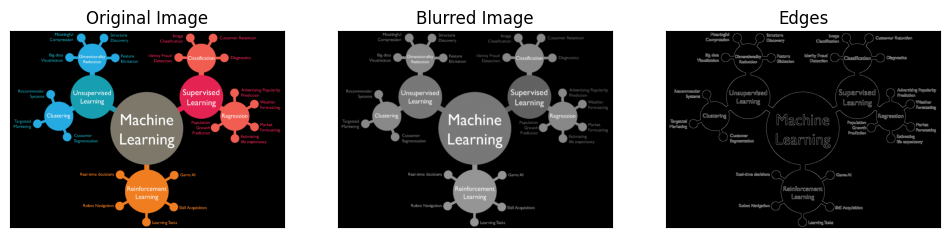

In [4]:
#path to the local image
image_path = '/content/machine-learning.png'
# Read the image from the local file
image = cv2.imread(image_path)
#cloading the image
image_in_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#applying Gaussian blur to reduce noise
image_blurred = cv2.GaussianBlur(image_in_gray, (5, 5), 0)
#performing Canny edge detection
edges = cv2.Canny(image_blurred, 50, 150)
#displaying the original image, blurred image, and edges
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_blurred, cmap='gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(edges, cmap='gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

plt.show()

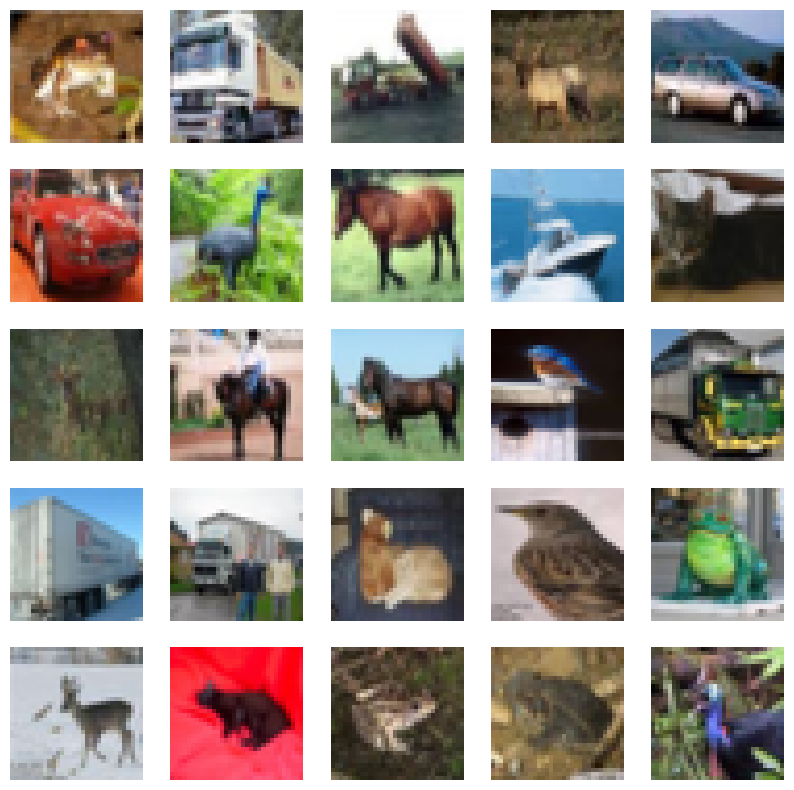

Image shape: (32, 32, 3)
Pixel values:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
RGB image shape: (32, 32, 3)
CMYK image shape: (32, 32, 3)


In [5]:
#loading the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#displaying sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()
#printing the shape of the images
print("Image shape:", x_train[0].shape)
#printing the pixel values of the first image
print("Pixel values:")
print(x_train[0])
#converting the pixel values to the RGB color space
x_train_rgb = x_train.astype('float32') / 255.0
#converting the pixel values to the CMYK color space
x_train_cmyk = 1.0 - x_train_rgb
#printing the shape of the RGB image
print("RGB image shape:", x_train_rgb[0].shape)
#printing the shape of the CMYK image
print("CMYK image shape:", x_train_cmyk[0].shape)

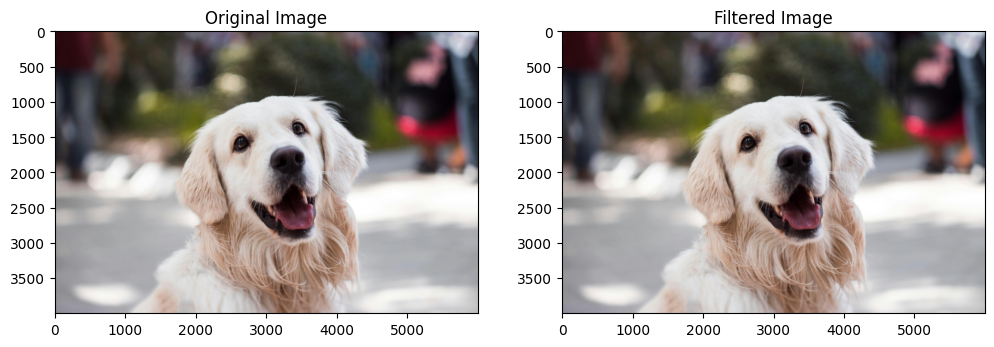

In [5]:
#loading the image
image_path = '/content/pexels-svetozar-milashevich-99573-1490908.jpg'
image = cv2.imread(image_path)
# applying a Gaussian blur filter
filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
plt.figure(figsize=(12, 6))
#displaying the original and filtered images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.show()

<ipython-input-38-f0d7218f96e3>:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image)
<ipython-input-38-f0d7218f96e3>:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(filtered_image)


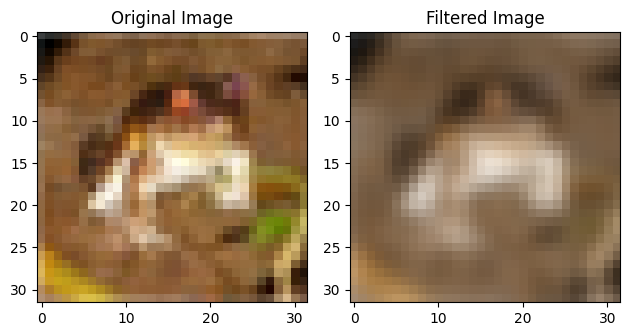

In [38]:
#selectong an image from the CIFAR-10 dataset
image = x_train[0]
#displaying the original image
plt.subplot(1, 2, 1)
imshow(image)
plt.title('Original Image')
#applying a Gaussian blur filter to the image
filtered_image = gaussian(image, sigma=1)
#displaying the filtered image
plt.subplot(1, 2, 2)
imshow(filtered_image)
plt.title('Filtered Image')
plt.show()

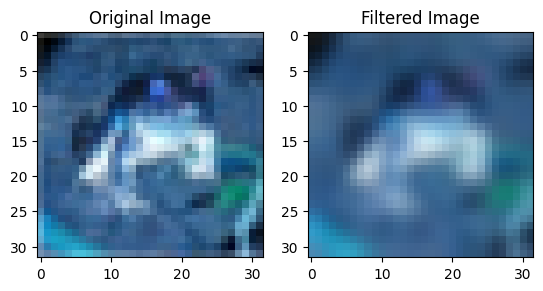

In [42]:
#applying a Gaussian blur filter
filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

#displaying the original and filtered images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')

plt.show()

In [44]:
#loading CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [46]:
model = models.Sequential()
#convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6467 - loss: 1.0035 - val_accuracy: 0.6585 - val_loss: 0.9810
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.6906 - loss: 0.8779 - val_accuracy: 0.6867 - val_loss: 0.9103
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7163 - loss: 0.8041 - val_accuracy: 0.7064 - val_loss: 0.8600
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7422 - loss: 0.7368 - val_accuracy: 0.7053 - val_loss: 0.8544
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7569 - loss: 0.6889 - val_accuracy: 0.6895 - val_loss: 0.9176
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7773 - loss: 0.6331 - val_accuracy: 0.7017 - val_loss: 0.8857
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7945 - loss: 0.5867 - val_accuracy: 0.7136 - val_loss: 0.8550
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.8077 -

In [54]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - 12ms/step - accuracy: 0.7103 - loss: 0.9194
Test accuracy: 0.7103000283241272


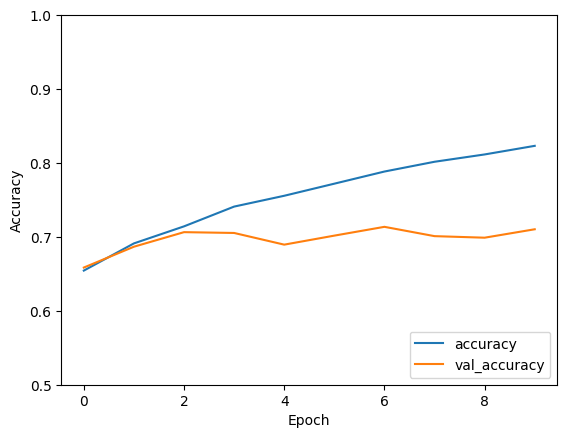

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

load and preprocess the dataset.

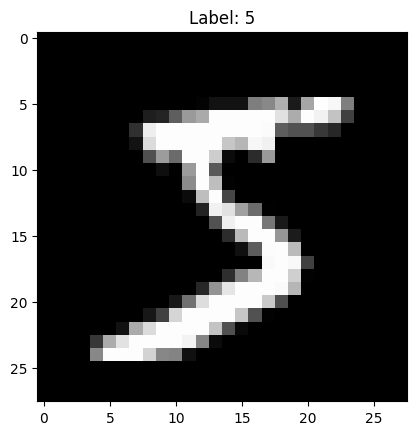

In [5]:
#loading MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
#normalizing the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#reshapeing the data to include the single color channel (for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
#visualizing a few samples
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

 Building the CNN Model

In [6]:
#defineing the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#printing summary of the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the CNN Model

In [7]:
#training the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.9005 - loss: 0.3270 - val_accuracy: 0.9813 - val_loss: 0.0565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9857 - loss: 0.0458 - val_accuracy: 0.9906 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9899 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.9876 - val_loss: 0.0368
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9890 - val_loss: 0.0349
313/313 - 3s - 9ms/step - accuracy: 0.9890 - loss: 0.0349
Test accuracy: 0.9890000224113464


Visualizing the Training Process

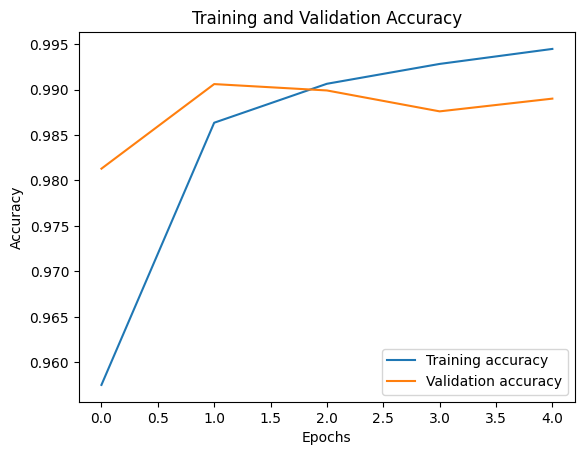

In [8]:
#plotting training and validation accuracy of the model
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Evaluating the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


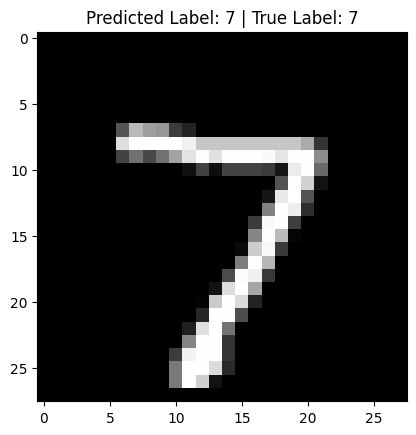

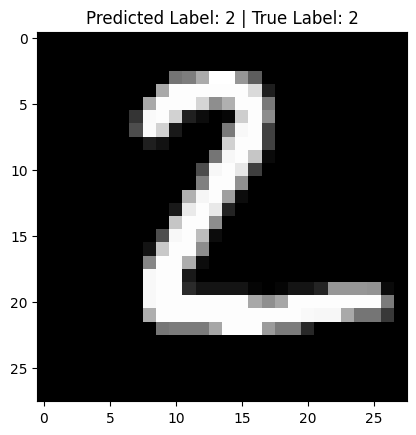

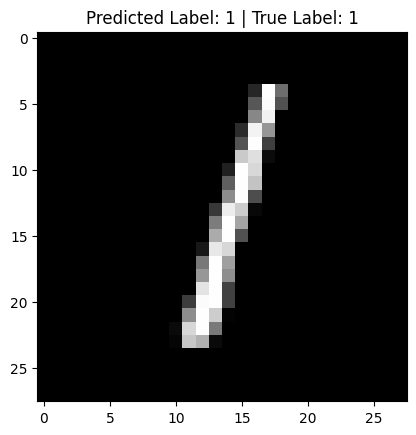

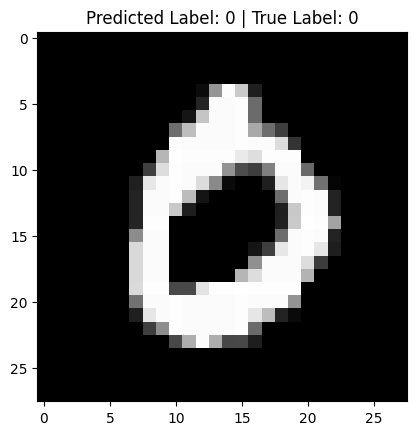

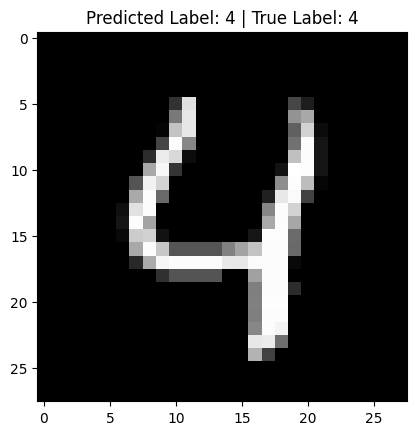

In [9]:
#predicting the first 5 images in the test set
predictions = model.predict(test_images[:5])
#displaying predictions and images
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predictions[i].argmax()} | True Label: {test_labels[i]}")
    plt.show()